In [142]:
import pandas as pd
from model import GPTJ
import decouple
import openai
from utils.safedict import SafeDict
import numpy as np

#- speak like a human

#- if the input is already under 120 characters, you can keep it as it is

# ---------------------------------------------- #
# Prepare dataset
# ---------------------------------------------- #
df = pd.read_csv('./H+GPT3/all_final.csv')
df2 = df[df.source=='AI'].pivot_table(index = ['a1'], aggfunc ='size')
print(len(df[df.source=='AI']))
print(len(df[df.source=='AI'].a1.unique()))

# df = df[df.source=='AI']
prompt = """Rephrase the input text using the following constraints:
- keep the same meaning and ideas
- use simple language, avoid using abstract concepts
- summarize the input text into 1 sentence or 2 very short sentences (keep it under 120 characters)
- take inspiration (in terms of phrasing and length, not the content) from these examples from real humans: 
example 1: {}
example 2: {}
example 3: {}
input text: {}
output text:
"""

def get_examples(title):
    return df[(df.source=='Human') & (df.title==title)].sample(3).a1.values.tolist()


df.loc[df.title.str.contains('Sophie'), 'title'] = 'Sophie'

# df['a2'] = df.apply(lambda x: prompt.format(*get_examples(x['title']), x['a1']), axis=1)
df['q2'] = df.apply(lambda x: prompt.format(*get_examples(x['title']), x['a1']), axis=1)


# ---------------------------------------------- #
# Prepare open ai model
# ---------------------------------------------- #
openai.api_key = decouple.config('OPENAI_API_KEY')

# Basic configuration
config = SafeDict(**{
    # Engine
    "engine": 'text-davinci-003',  # engine being used from the API
    "temperature": 1,  # Temperature of the softmax sampling for the engine
    "max_tokens": 256,  # Max nb of tokens that will be processed by the engine
    # Question Configuration
    # 'full': keeps the full question // 'half': cuts the second half of the question
    "question_mode": "full",
    # [int] : nb of answers that will be shown in the prompt given to the model
    "nb_answers": 0,
    "additional_questions": [],
    "nb_run_per_question": 1,
    # Name of the training
    "name": None,  # Name of the training
    "prefix": "",
    "data_path": None,  # Path to the training data
    "analyses": [],
    "exp": None
})


gpt = GPTJ(config=config)

np.random.seed(123)
count = 0
for i, row in df[df.source=='AI'].iterrows():
    count += 1
    print(i)
    gpt.reset_rec()
    a, fa = gpt.ask_rec(row['q2'])
    # take df and add col a2 using i as index
    df.loc[i, 'a2'] = a
    
df.to_csv('./H+GPT3/dv2_all_final_disguise_2.csv')

    

1766
1699
4
8
11
12
13
14
15
17
18
19
24
26
27
28
30
32
36
37
38
39
40
41
46
48
50
51
52
55
56
61
62
63
64
66
69
70
71
72
73
75
77
78
79
80
81
82
83
84
86
87
88
89
92
93
101
103
104
106
108
109
110
113
114
116
117
118
121
123
125
126
128
129
130
131
133
137
138
143
149
150
152
154
158
159
163
166
167
169
170
171
174
176
177
180
182
183
185
187
189
190
191
193
195
198
200
205
207
208
213
216
217
220
221
224
225
226
230
231
235
239
241
242
246
250
252
253
256
Error:  That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 798df1d5c8938cf4dacb2f6e0a31f581 in your message.)
Bad GateWay -- retrying in 1sec
258
259
260
262
264
268
269
273
274
275
282
283
287
289
290
292
293
296
297
298
300
302
305
306
307
309
312
314
315
317
318
319
320
321
325
328
329
330
331
335
339
341
342
343
344
345
346
348
350
351
352
353
354
355
356
360
362
365
369
370
371
374
375


In [166]:
import language_tool_python as ltp

fname = './H+GPT3/dv2_all_final_disguise.csv'
df = pd.read_csv(fname)
df['a2'] = df.a2.str.lower()
#titles = df[(df.source=='AI') & (df.a2.str.len() > 10)].title
#
#print(len(titles))
#df = df[df.title.isin(titles)]
#dropnb = len(df[df.source=='Human']) - len(titles)
#indexes = df[df.source=='Human'].sample(dropnb).index
#
#print('Size of the current dataset: ', len(df))
#print('rows to drop: ', dropnb)
#
#df = df.drop(indexes)
#df  = df[((df.source=='AI') & (df.a2.str.len() > 10)) | (df.source=='Human')]
#
#print('Size of the current dataset after dropping: ', len(df))
#print('Size of the current dataset where source is AI: ', len(df[df.source=='AI']))
#print('Size of the current dataset where source is Human: ', len(df[df.source=='Human']))

def rule(x):
   dic = ['HIV', 'Mrs', 'VCR']
   err = []
   for m in tool.check(x):
         if m.category in ('TYPOS', 'GRAMMAR') and m.ruleId not in ('UPPERCASE_SENTENCE_START', 'I_LOWERCASE'):
            if any(el in m.replacements for el in dic): 
               continue
            err.append(m)
   return len(err)
            
               
#
with ltp.LanguageTool('en-US', remote_server='http://localhost:8081') as tool:
   df['corra1'] = df.a1.apply(rule)
   df['corra2'] = df.a2.apply(rule)

df['lena1'] = df.a1.apply(lambda x: len(x))
df['lena2'] = df.a2.apply(lambda x: len(x) if isinstance(x, str) else None)

df.loc[df.source=='Human', 'lena2'] = None
df.loc[df.source=='Human', 'corra2'] = None

df_short = df[['corra1', 'corra2', 'a1', 'a2', 'lena1', 'lena2', 'title', 'source']]
#
df.to_csv(fname)

In [165]:
test_str = "because mrs. santiago can only have her appointment at 10:00 am, and mr. morris is flexible with his time, it makes sense to schedule mr. morris for 3:00 pm. this will allow both mr. morris and mrs. santiago to have their appointments next monday."

with ltp.LanguageTool('en-US', remote_server='http://localhost:8081') as tool:
    err = [m for m in tool.check(test_str) if m.category in ('TYPOS', 'GRAMMAR') and m.ruleId not in ('UPPERCASE_SENTENCE_START', 'I_LOWERCASE')]

a = set(['Mrs', 'HIV'])
print(any(el in a for el in err[0].replacements))

True


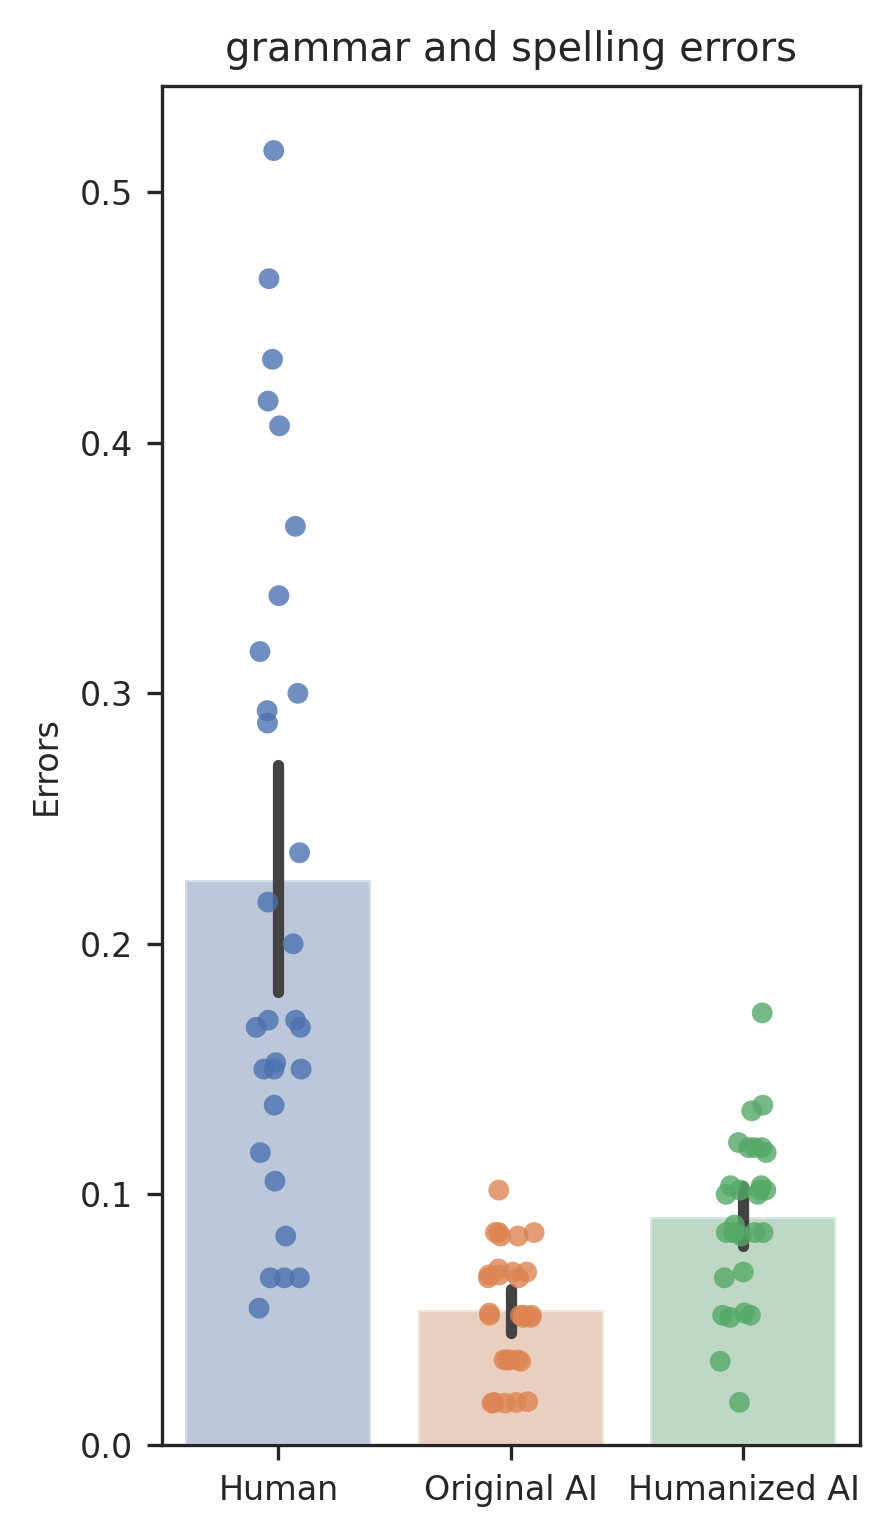

              T  dof alternative     p-val           CI95%  cohen-d      BF10  \
T-test -4.99549   58   two-sided  0.000006  [-0.05, -0.02]  1.28983  2779.731   

           power  
T-test  0.998418  


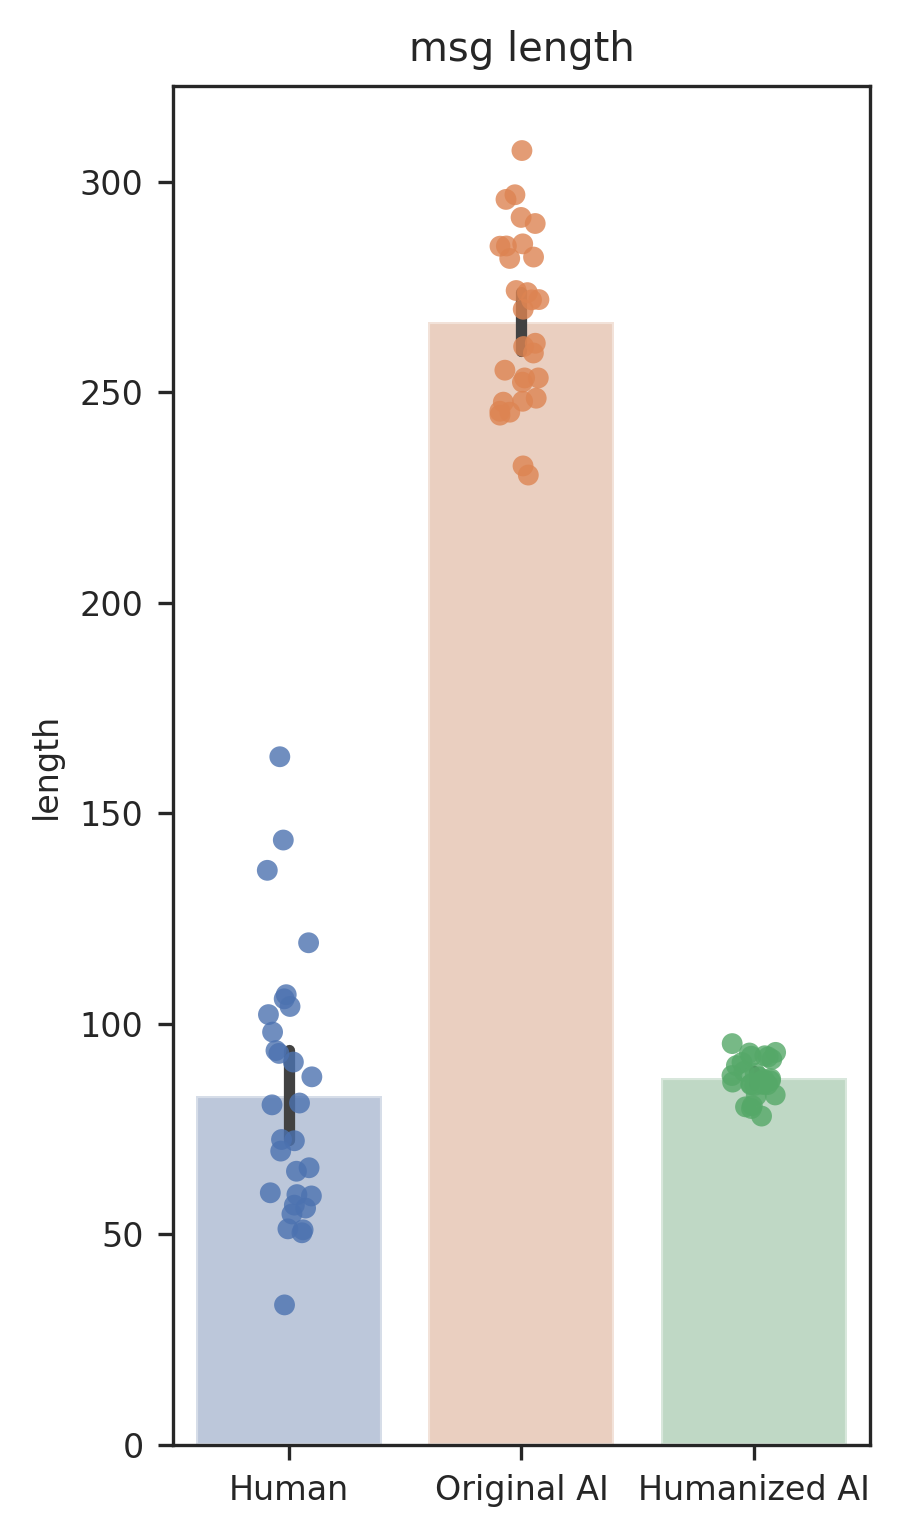

                T  dof alternative         p-val             CI95%    cohen-d  \
T-test  47.390303   58   two-sided  4.487396e-48  [171.96, 187.13]  12.236124   

             BF10  power  
T-test  1.465e+44    1.0  


SyntaxError: 'return' outside function (972166303.py, line 30)

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

df2 = df[df.source=='AI'].groupby('sub_id', as_index=False).mean()
df3 = df[df.source=='Human'].groupby('sub_id', as_index=False).mean()
plt.title('grammar and spelling errors')
sns.set({'figure.figsize': (3, 6), 'figure.dpi': 300, 'font.size': 8})
sns.set_style('ticks')
data = [df3['corra1'], df2['corra1'], df2['corra2']]
sns.barplot(data=data, alpha=0.4)
sns.stripplot(data=data, alpha=0.8)
plt.ylabel('Errors')
plt.xticks([0, 1, 2], ['Human', 'Original AI', 'Humanized AI'])
plt.show()
print(pg.ttest(df2['corra1'], df2['corra2']))


plt.title('msg length')
sns.set_style('ticks')
data = [df3['lena1'], df2['lena1'], df2['lena2']]
sns.barplot(data=data, alpha=0.4)
sns.stripplot(data=data, alpha=0.8)
plt.ylabel('length')
plt.xticks([0, 1, 2], ['Human', 'Original AI', 'Humanized AI'])
plt.show()

plt.show()
print(pg.ttest(df2['lena1'], df2['lena2']))
return 

# same with length
plt.title('Human vs AI slang: length')
sns.set_style('ticks')
sns.barplot(data=[df3['lena1'],  df2['lena2']], alpha=0.4, zorder=0)
sns.stripplot(data=[df3['lena1'],  df2['lena2']], alpha=0.8)
# sns.stripplot(data=df2[['lena1', 'lena2']], alpha=0.4)
plt.xticks([0, 1], ['Human', 'AI Humanized'])
plt.ylabel('Length')
plt.show()
print(pg.ttest(df3['lena1'], df2['lena2']))

plt.title('Human vs AI slang')
sns.set_style('ticks')
sns.barplot(data=[df3['corra1'],  df2['corra2']], alpha=0.4)
sns.stripplot(data=[df3['corra1'],  df2['corra2']], alpha=0.8)
plt.ylabel('Errors')
plt.xticks([0, 1], ['Human', 'AI Humanized'])
plt.show()
print(pg.ttest(df3['corra1'], df2['corra2']))


